In [1]:
pwd

'/content'

In [2]:
!git clone https://github.com/theschoolof-ai/JEDI.git

Cloning into 'JEDI'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 256 (delta 0), reused 26 (delta 0), pack-reused 227
Receiving objects: 100% (256/256), 119.12 MiB | 38.03 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [2]:
cd /content/JEDI/tsai.jedi

/content/JEDI/tsai.jedi


In [3]:
import sys
sys.path.append('Models/')
from S7 import model_summary
from S9_resnet import resnet18


In [ ]:
#! pip install albumentations==0.4.6

In [5]:
sys.path.append(".")
import torch
import config
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from Engine_train_test import train, test
from dataloader import train_loader_CIFAR10_alb, test_loader_CIFAR10_alb

In [39]:
model_ = resnet18(num_classes = 10,pretrained = False).to(config.device)
print(model_summary(model_, config.input_size_CIFAR10))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

In [40]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

accu = []
loss_test = []

optimizer = optim.SGD(model_.parameters(), lr=0.016, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=2, gamma=0.92)

valid_acc = []
loss_test_ = []
l1_regularization = [0, 0]
for epoch in range(1, 40):
    train(model_, config.device, train_loader_CIFAR10_alb, optimizer, epoch, l1_regularization=[0, 1])
    scheduler.step()
    valid_a, valid_l = test(model_, config.device, test_loader_CIFAR10_alb)
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    loss_test_.append(valid_l)

accu.append(valid_acc)
loss_test.append(loss_test_)



Epoch: 1,LR: 0.016.
Train set: train Average loss: 0.8920, train_Accuracy: 23573/50000 (47.1460%)



loss=1.32054603099823 batch_id=0:   0%|          | 1/391 [00:00<01:05,  5.97it/s]


Test set: Average loss: 0.0102, Accuracy: 5574/10000 (55.7400%)



Epoch: 2,LR: 0.016.
Train set: train Average loss: 0.6968, train_Accuracy: 33513/50000 (67.0260%)



loss=0.7479305863380432 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.24it/s]


Test set: Average loss: 0.0063, Accuracy: 7211/10000 (72.1100%)



Epoch: 3,LR: 0.01472.
Train set: train Average loss: 0.6854, train_Accuracy: 37916/50000 (75.8320%)



loss=0.5745161771774292 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.14it/s]


Test set: Average loss: 0.0055, Accuracy: 7605/10000 (76.0500%)



Epoch: 4,LR: 0.01472.
Train set: train Average loss: 0.5008, train_Accuracy: 40163/50000 (80.3260%)



loss=0.6251643300056458 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.12it/s]


Test set: Average loss: 0.0068, Accuracy: 7190/10000 (71.9000%)



Epoch: 5,LR: 0.013542400000000001.
Train set: train Average loss: 0.3360, train_Accuracy: 41809/50000 (83.6180%)



loss=0.3007599115371704 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.22it/s]


Test set: Average loss: 0.0049, Accuracy: 7918/10000 (79.1800%)



Epoch: 6,LR: 0.013542400000000001.
Train set: train Average loss: 0.4256, train_Accuracy: 43001/50000 (86.0020%)



loss=0.38280048966407776 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.24it/s]


Test set: Average loss: 0.0049, Accuracy: 7872/10000 (78.7200%)



Epoch: 7,LR: 0.012459008000000002.
Train set: train Average loss: 0.2971, train_Accuracy: 44142/50000 (88.2840%)



loss=0.2633896768093109 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.24it/s]


Test set: Average loss: 0.0045, Accuracy: 8143/10000 (81.4300%)



Epoch: 8,LR: 0.012459008000000002.
Train set: train Average loss: 0.2642, train_Accuracy: 44878/50000 (89.7560%)



loss=0.32319459319114685 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.28it/s]


Test set: Average loss: 0.0045, Accuracy: 8177/10000 (81.7700%)



Epoch: 9,LR: 0.011462287360000002.
Train set: train Average loss: 0.2229, train_Accuracy: 45734/50000 (91.4680%)



loss=0.18352152407169342 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.18it/s]


Test set: Average loss: 0.0042, Accuracy: 8307/10000 (83.0700%)



Epoch: 10,LR: 0.011462287360000002.
Train set: train Average loss: 0.2159, train_Accuracy: 46453/50000 (92.9060%)



loss=0.21792982518672943 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.12it/s]


Test set: Average loss: 0.0042, Accuracy: 8340/10000 (83.4000%)



Epoch: 11,LR: 0.010545304371200001.
Train set: train Average loss: 0.1713, train_Accuracy: 47029/50000 (94.0580%)



loss=0.10369537770748138 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.16it/s]


Test set: Average loss: 0.0049, Accuracy: 8217/10000 (82.1700%)



Epoch: 12,LR: 0.010545304371200001.
Train set: train Average loss: 0.1511, train_Accuracy: 47397/50000 (94.7940%)



loss=0.15434050559997559 batch_id=0:   0%|          | 1/391 [00:00<01:01,  6.32it/s]


Test set: Average loss: 0.0047, Accuracy: 8299/10000 (82.9900%)



Epoch: 13,LR: 0.009701680021504002.
Train set: train Average loss: 0.2801, train_Accuracy: 47942/50000 (95.8840%)



loss=0.07499771565198898 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.21it/s]


Test set: Average loss: 0.0044, Accuracy: 8395/10000 (83.9500%)



Epoch: 14,LR: 0.009701680021504002.
Train set: train Average loss: 0.0856, train_Accuracy: 48003/50000 (96.0060%)



loss=0.10918115079402924 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.26it/s]


Test set: Average loss: 0.0043, Accuracy: 8410/10000 (84.1000%)



Epoch: 15,LR: 0.008925545619783683.
Train set: train Average loss: 0.1179, train_Accuracy: 48511/50000 (97.0220%)



loss=0.07335725426673889 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.23it/s]


Test set: Average loss: 0.0042, Accuracy: 8524/10000 (85.2400%)



Epoch: 16,LR: 0.008925545619783683.
Train set: train Average loss: 0.1302, train_Accuracy: 48688/50000 (97.3760%)



loss=0.04699147492647171 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.14it/s]


Test set: Average loss: 0.0043, Accuracy: 8502/10000 (85.0200%)



Epoch: 17,LR: 0.008211501970200989.
Train set: train Average loss: 0.1147, train_Accuracy: 48931/50000 (97.8620%)



loss=0.0888829305768013 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.25it/s]


Test set: Average loss: 0.0043, Accuracy: 8508/10000 (85.0800%)



Epoch: 18,LR: 0.008211501970200989.
Train set: train Average loss: 0.0252, train_Accuracy: 49044/50000 (98.0880%)



loss=0.03868195042014122 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.21it/s]


Test set: Average loss: 0.0046, Accuracy: 8439/10000 (84.3900%)



Epoch: 19,LR: 0.007554581812584909.
Train set: train Average loss: 0.0231, train_Accuracy: 49241/50000 (98.4820%)



loss=0.04012893885374069 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.22it/s]


Test set: Average loss: 0.0042, Accuracy: 8550/10000 (85.5000%)



Epoch: 20,LR: 0.007554581812584909.
Train set: train Average loss: 0.0791, train_Accuracy: 49319/50000 (98.6380%)



loss=0.013799766078591347 batch_id=0:   0%|          | 1/391 [00:00<01:01,  6.33it/s]


Test set: Average loss: 0.0043, Accuracy: 8559/10000 (85.5900%)



Epoch: 21,LR: 0.006950215267578117.
Train set: train Average loss: 0.0649, train_Accuracy: 49378/50000 (98.7560%)



loss=0.08765673637390137 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.23it/s]


Test set: Average loss: 0.0042, Accuracy: 8592/10000 (85.9200%)



Epoch: 22,LR: 0.006950215267578117.
Train set: train Average loss: 0.0551, train_Accuracy: 49433/50000 (98.8660%)



loss=0.025678176432847977 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.09it/s]


Test set: Average loss: 0.0044, Accuracy: 8558/10000 (85.5800%)



Epoch: 23,LR: 0.006394198046171868.
Train set: train Average loss: 0.0213, train_Accuracy: 49585/50000 (99.1700%)



loss=0.026396727189421654 batch_id=0:   0%|          | 1/391 [00:00<01:06,  5.91it/s]


Test set: Average loss: 0.0041, Accuracy: 8644/10000 (86.4400%)



Epoch: 24,LR: 0.006394198046171868.
Train set: train Average loss: 0.0150, train_Accuracy: 49628/50000 (99.2560%)



loss=0.034190915524959564 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.17it/s]


Test set: Average loss: 0.0040, Accuracy: 8671/10000 (86.7100%)



Epoch: 25,LR: 0.005882662202478119.
Train set: train Average loss: 0.0227, train_Accuracy: 49647/50000 (99.2940%)



loss=0.029490286484360695 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.18it/s]


Test set: Average loss: 0.0042, Accuracy: 8609/10000 (86.0900%)



Epoch: 26,LR: 0.005882662202478119.
Train set: train Average loss: 0.0093, train_Accuracy: 49727/50000 (99.4540%)



loss=0.039615560322999954 batch_id=0:   0%|          | 1/391 [00:00<01:01,  6.32it/s]


Test set: Average loss: 0.0040, Accuracy: 8667/10000 (86.6700%)



Epoch: 27,LR: 0.005412049226279869.
Train set: train Average loss: 0.0251, train_Accuracy: 49757/50000 (99.5140%)



loss=0.019004089757800102 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.24it/s]


Test set: Average loss: 0.0039, Accuracy: 8713/10000 (87.1300%)



Epoch: 28,LR: 0.005412049226279869.
Train set: train Average loss: 0.0036, train_Accuracy: 49774/50000 (99.5480%)



loss=0.006026293616741896 batch_id=0:   0%|          | 1/391 [00:00<01:01,  6.29it/s]


Test set: Average loss: 0.0039, Accuracy: 8721/10000 (87.2100%)



Epoch: 29,LR: 0.00497908528817748.
Train set: train Average loss: 0.0301, train_Accuracy: 49844/50000 (99.6880%)



loss=0.02311861142516136 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.27it/s]


Test set: Average loss: 0.0039, Accuracy: 8710/10000 (87.1000%)



Epoch: 30,LR: 0.00497908528817748.
Train set: train Average loss: 0.0270, train_Accuracy: 49864/50000 (99.7280%)



loss=0.008342987857758999 batch_id=0:   0%|          | 1/391 [00:00<01:01,  6.31it/s]


Test set: Average loss: 0.0040, Accuracy: 8741/10000 (87.4100%)



Epoch: 31,LR: 0.004580758465123282.
Train set: train Average loss: 0.0084, train_Accuracy: 49868/50000 (99.7360%)



loss=0.032447800040245056 batch_id=0:   0%|          | 1/391 [00:00<01:04,  6.07it/s]


Test set: Average loss: 0.0038, Accuracy: 8775/10000 (87.7500%)



Epoch: 32,LR: 0.004580758465123282.
Train set: train Average loss: 0.0092, train_Accuracy: 49879/50000 (99.7580%)



loss=0.00435572350397706 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.21it/s]


Test set: Average loss: 0.0039, Accuracy: 8757/10000 (87.5700%)



Epoch: 33,LR: 0.004214297787913419.
Train set: train Average loss: 0.0071, train_Accuracy: 49897/50000 (99.7940%)



loss=0.004290583543479443 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.28it/s]


Test set: Average loss: 0.0039, Accuracy: 8700/10000 (87.0000%)



Epoch: 34,LR: 0.004214297787913419.
Train set: train Average loss: 0.0186, train_Accuracy: 49912/50000 (99.8240%)



loss=0.0024708944838494062 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.21it/s]


Test set: Average loss: 0.0039, Accuracy: 8722/10000 (87.2200%)



Epoch: 35,LR: 0.0038771539648803457.
Train set: train Average loss: 0.0027, train_Accuracy: 49892/50000 (99.7840%)



loss=0.009260682389140129 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.25it/s]


Test set: Average loss: 0.0039, Accuracy: 8712/10000 (87.1200%)



Epoch: 36,LR: 0.0038771539648803457.
Train set: train Average loss: 0.0028, train_Accuracy: 49920/50000 (99.8400%)



loss=0.005851472727954388 batch_id=0:   0%|          | 1/391 [00:00<01:02,  6.23it/s]


Test set: Average loss: 0.0038, Accuracy: 8748/10000 (87.4800%)



Epoch: 37,LR: 0.003566981647689918.
Train set: train Average loss: 0.0021, train_Accuracy: 49933/50000 (99.8660%)



loss=0.003820921992883086 batch_id=0:   0%|          | 1/391 [00:00<01:03,  6.17it/s]


Test set: Average loss: 0.0039, Accuracy: 8724/10000 (87.2400%)



Epoch: 38,LR: 0.003566981647689918.
Train set: train Average loss: 0.0052, train_Accuracy: 49919/50000 (99.8380%)



loss=0.0030980047304183245 batch_id=0:   0%|          | 1/391 [00:00<01:04,  6.08it/s]


Test set: Average loss: 0.0038, Accuracy: 8770/10000 (87.7000%)



Epoch: 39,LR: 0.0032816231158747248.
Train set: train Average loss: 0.0156, train_Accuracy: 49938/50000 (99.8760%)


Test set: Average loss: 0.0037, Accuracy: 8787/10000 (87.8700%)



In [41]:
torch.save(model_, '/content/JEDI/tsai.jedi/model_objects/s9_resnet_albu_v2.pt')

### Correctly Classified Images And Labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


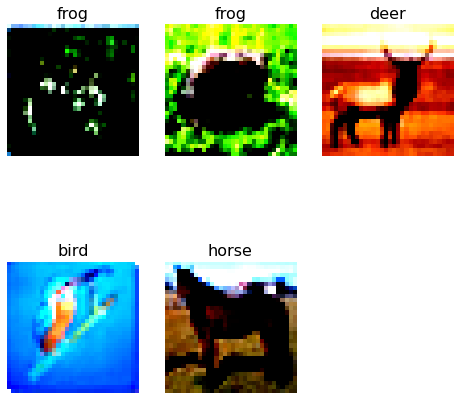

In [42]:
from aftereffects import get_image_with_target, plots
path = '/content/JEDI/tsai.jedi/model_objects/s9_resnet_albu_v2.pt'
data_, target_, pred_ = get_image_with_target(model_path=path, number_of_img=5, dataloader=test_loader_CIFAR10_alb)
plots(data_, titles=pred_)

### Using Gradcam to analyze test images

In [12]:
img, label = next(iter(test_loader_CIFAR10_alb))

In [31]:
index = [100,121]
data_t = img.index_select(0,torch.tensor(index))
target_t = label.index_select(0,torch.tensor(index))
data_t.shape,target_t.shape

(torch.Size([2, 3, 32, 32]), torch.Size([2]))

In [10]:
path = '/content/JEDI/tsai.jedi/model_objects/s9_resnet_albu_v2.pt'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


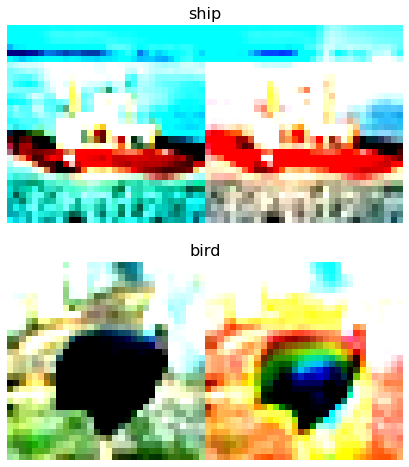

In [43]:
import config
from gradcam import GradCam
from gradcam import show_cam_on_image
gradcam_img = []
for idx in range(len(data_t)): 
    ip = data_t.index_select(0,torch.tensor(idx))
    grad_cam = GradCam(model=model, feature_module=model.layer3,target_layer_names=["1"], use_cuda=config.use_cuda)
    mask = grad_cam(ip)
    op_img = show_cam_on_image(ip.squeeze().permute(1,2,0), mask)
    gradcam_img.append(op_img)
plots(gradcam_img,titles=target_t )